# Object:

### Credit Card Fraud Detection.

# Description:

### detecting credit card transactions that might be fraudulent or genuine by classifications algorithms.


# Tools:

### SKLearn.
### pandas.
### Numpy.
### matplotlib.

In [152]:
!pip install imbalanced-learn
!pip install delayed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier

## The Dataset:

In [136]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# EDA & Data Cleaning:

In [4]:
data.shape

(284807, 31)

In [32]:
data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [83]:
new_data= data.sample(n=100000, random_state=42)
new_data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17982,29087.0,-0.439175,1.791178,-3.025161,1.739611,0.378940,-1.705053,0.351634,0.589011,-0.360449,...,-0.144824,-0.387587,0.069581,-0.463910,-0.335798,-0.359253,0.219279,-0.189818,89.99,0
207181,136557.0,-0.164962,0.108651,0.048298,-1.839630,0.891619,-0.346200,0.532236,-0.140498,-1.763655,...,-0.043972,0.320744,-0.322222,-1.049670,-0.213737,0.756317,0.097242,0.146860,9.00,0
64623,51231.0,0.501707,0.195997,-0.232957,-1.179140,0.330700,-0.313881,0.339983,-0.152832,-1.716797,...,0.345878,0.955826,-0.130792,-0.784336,-0.697626,-0.166605,0.168663,0.136823,15.00,0
43196,41410.0,-1.544989,-0.027079,2.123112,1.895660,-0.837558,0.854081,-0.632987,0.844261,0.745611,...,-0.133350,-0.139874,-0.236078,0.108203,-0.150744,-0.267815,0.080069,-0.111691,84.45,0


In [84]:
new_x= new_data.drop(['Class'], axis=1)
new_y= new_data['Class']

In [97]:
new_x.shape

(100000, 30)

## Oversampling:

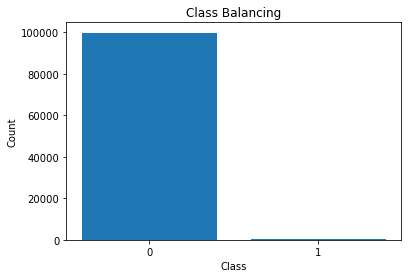

In [85]:
targets,count = np.unique(new_y,return_counts=True)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in targets],count)
plt.show()

In [86]:
X1= new_x.to_numpy()
y1= new_y.to_numpy()
X1, y1 = SMOTE().fit_resample(X1,y1)
y1 = y1.reshape(-1,1)


In [108]:
#X1.shape
y1.shape

(199678, 1)

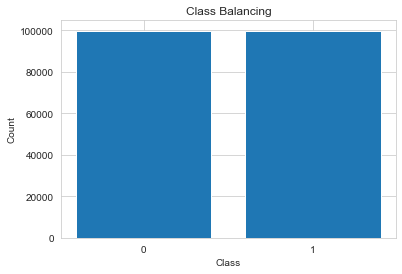

In [59]:
targets,count = np.unique(y1,return_counts=True)
plt.title("Class Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.bar([str(i) for i in targets],count)
plt.show()

## Splitting Data:

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X11, y11, test_size=0.2, random_state=42)

## Test Classification Models:

In [113]:
lr_model =LogisticRegression(solver='lbfgs', max_iter=1000)
knn_model =KNeighborsClassifier()
rf_model =RandomForestClassifier(n_estimators=100, random_state=0)
et_model =ExtraTreesClassifier(n_estimators=100, random_state=0)

In [129]:
models = ["et_model", "lr_model", "rf_model", "et_model"]

for model in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)
    
    with open(f"C:\\Users\\sshah\\OneDrive\\Desktop\\new_classification_model\\{model_name}.pickle", "wb") as pfile:
        pickle.dump(curr_model, pfile)

In [130]:
import pickle

models_names = ["lr_model", "knn_model", "rf_model", "et_model"]

for model_name in model_names:
    with open(f"C:\\Users\\sshah\\OneDrive\\Desktop\\new_classification_model\\{model_name}.pickle", "rb") as pfile:
        exec(f"{model_name} = pickle.load(pfile)")

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))
model_list

[('lr_model', LogisticRegression(max_iter=1000)),
 ('knn_model', KNeighborsClassifier()),
 ('rf_model', RandomForestClassifier(random_state=0)),
 ('et_model', ExtraTreesClassifier(random_state=0))]

In [131]:
for model_name in models_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_model score: 0.9804437099358975
knn_model score: 0.927909655448718
rf_model score: 0.9997996794871795
et_model score: 0.9998747996794872


In [60]:
three_models= ["lr_model","rf_model", "et_model"]
for r in three_models:
    c_model= eval(r)
    y_pre= c_model.predict(X_test)

    print(f'F1 score for {r}:  {f1_score(y_test,y_pre)}')

F1 score for lr_model:  0.9721606927104308
F1 score for rf_model:  0.9997998899394668
F1 score for et_model:  0.9998749218261413


## Voting Classifier:

### Soft Case:

In [132]:
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(max_iter=1000)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=0)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=0))],
                 n_jobs=-1, voting='soft')

In [139]:
y_pred = voting_classifer.predict(X_test)


In [140]:
accuracy_score(y_test, y_pred)

0.9996995192307693

### Hard Case:

In [149]:
voting_classifer_hard = VotingClassifier(estimators=model_list,
                                    voting='hard', 
                                    n_jobs=-1)
voting_classifer_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(max_iter=1000)),
                             ('knn_model', KNeighborsClassifier()),
                             ('rf_model',
                              RandomForestClassifier(random_state=0)),
                             ('et_model',
                              ExtraTreesClassifier(random_state=0))],
                 n_jobs=-1)

In [151]:
y_pred_h = voting_classifer_hard.predict(X_test)
accuracy_score(y_test, y_pred_h)

0.998222155448718

# ROC & AUC Curve:

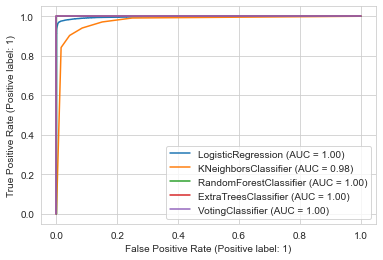

In [154]:
from sklearn.metrics import roc_auc_score, roc_curve
disb= plot_roc_curve(lr_model, X_test, y_test)
plot_roc_curve(knn_model, X_test, y_test, ax=disb.ax_);
plot_roc_curve(rf_model, X_test, y_test, ax=disb.ax_);
plot_roc_curve(et_model, X_test, y_test, ax=disb.ax_);
plot_roc_curve(voting_classifer, X_test, y_test, ax=disb.ax_);


## We realized that the best classification model is "Decision Trees" classifier with score 0.99987 and  AUC = 1